Benin Summary Statistics:
                Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2022-08-08 23:44            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     240.559452     167.187516     115.358961   
std                  NaN     331.131327     261.710501     158.691074   
min                  NaN     -12.900000      -7.800000     -12.600000   
25%                  NaN      -2.000000      -0.500000      -2.100000   
50%                  NaN       1.800000      -0.100000       1.600000   
75%                  NaN     483.400000     314.200000     216.300000   
max                  NaN    1413.000000     952.300000     759.200000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000  525

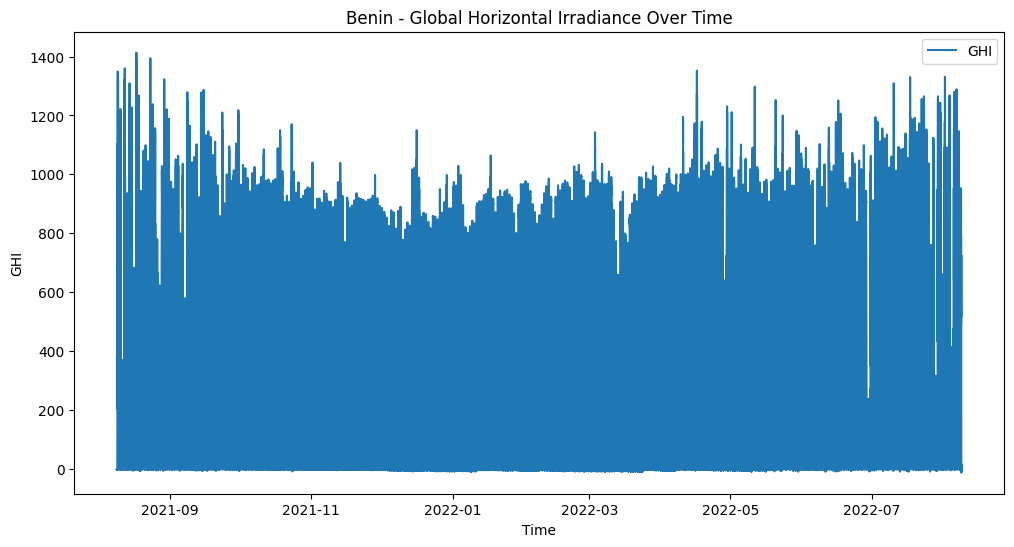

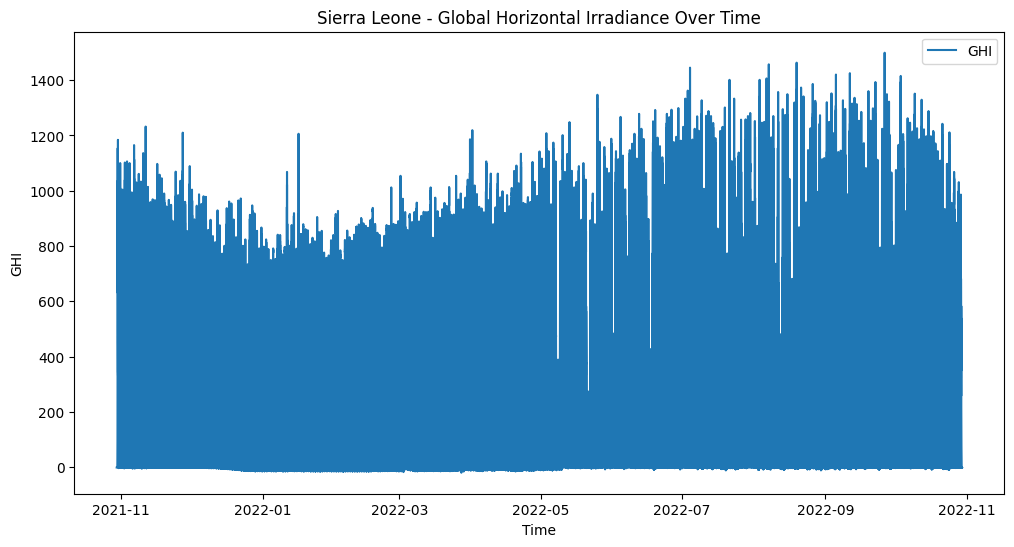

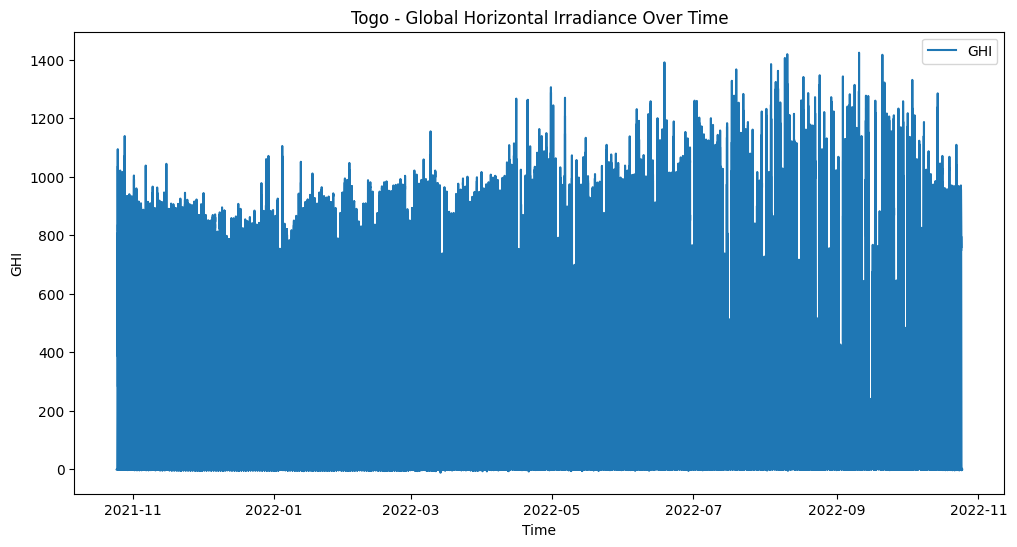

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

benin_data = pd.read_csv('../data/benin-malanville.csv')
sierraleone_data = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo_data = pd.read_csv('../data/togo-dapaong_qc.csv')

# Function to summarize data using pandas' describe() method, which returns summary statistics for all numeric columns by default.
def summarize_data(df):
    return df.describe(include='all')  # 'include=all' to get statistics for all columns

benin_summary = summarize_data(benin_data)
sierraleone_summary = summarize_data(sierraleone_data)
togo_summary = summarize_data(togo_data)

print("Benin Summary Statistics:\n", benin_summary)
print("Sierra Leone Summary Statistics:\n", sierraleone_summary)
print("Togo Summary Statistics:\n", togo_summary)

# Function for data qulity check using pandas isnull() and select_dtypes() method.
def data_quality_check(df):
    missing_values = df.isnull().sum()
    negative_values = df[df.select_dtypes(include='number') < 0].count()
    return missing_values, negative_values

benin_missing, benin_negatives = data_quality_check(benin_data)
sierraleone_missing, sierraleone_negatives = data_quality_check(sierraleone_data)
togo_missing, togo_negatives = data_quality_check(togo_data)

print("Benin Data Quality Check:\n", benin_missing, benin_negatives)
print("Sierra Leone Data Quality Check:\n", sierraleone_missing, sierraleone_negatives)
print("Togo Data Quality Check:\n", togo_missing, togo_negatives)


# Function for Plot line graphs or area plots to observe patterns over time.
def time_series_plot(df, column, title):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df[column], label=column)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Plot for each country
time_series_plot(benin_data, 'GHI', 'Benin - Global Horizontal Irradiance Over Time')
time_series_plot(sierraleone_data, 'GHI', 'Sierra Leone - Global Horizontal Irradiance Over Time')
time_series_plot(togo_data, 'GHI', 'Togo - Global Horizontal Irradiance Over Time')

